# 4.8 配置图例

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline 
import numpy as np

In [3]:
x = np.linspace(0, 10, 1000)

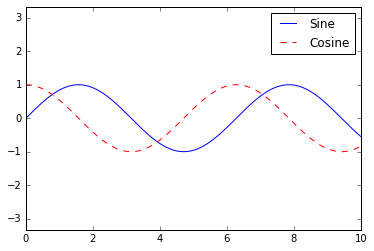

In [4]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

设置图例的位置，并取消外边框

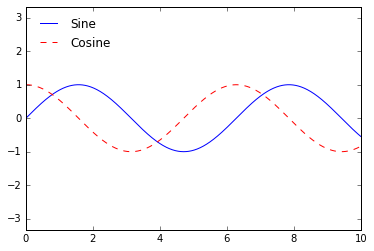

In [5]:
ax.legend(loc='upper left', frameon=False)
fig

用ncol参数设置图例的标签列数

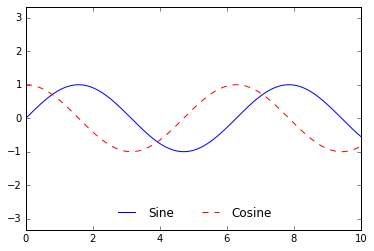

In [6]:
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

为图例定义圆角边框，增加阴影、改变外边框透明度，改变文字间距

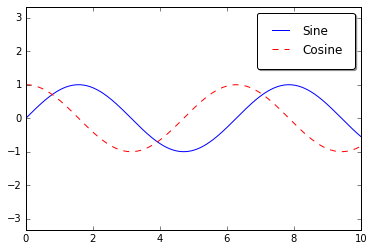

In [7]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
fig

## 4.8.1 选择图例显示的元素

**方法一：将需要显示的线条传入plt.legend()。**

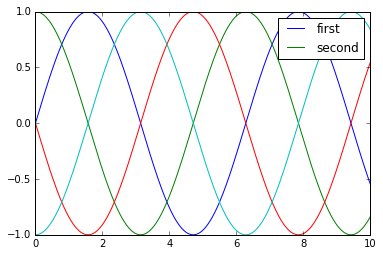

In [13]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

#lines变量是一组plt.Line2D实例
plt.legend(lines[:2], ['first', 'second'])

In [15]:
lines

**方法二：只为需要在图例中显示的线条设置标签。**

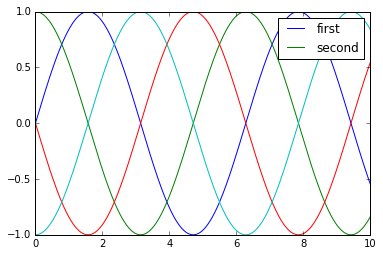

In [19]:
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

y[:, 2:]，这里看似好像多了一个冒号，意思是把后面的两条曲线不做标注，全画了。

## 4.8.2 在图例中显示不同尺寸的点

In [20]:
import pandas as pd

In [21]:
cities = pd.read_csv('./data/california_cities.csv')

In [22]:
# 提取感兴趣的数据
lat, lon = cities['latd'], cities['longd']

In [23]:
population, area = cities['population_total'], cities['area_total_km2']

Text(0.5,1,'California Cities: Area and Population')

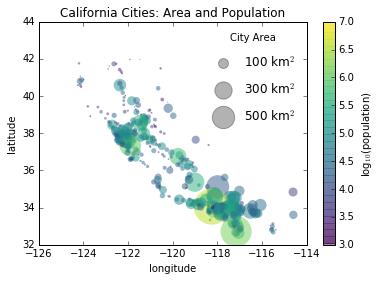

In [28]:
# 用不同的尺寸和颜色的散点图表示数据，但是不带标签
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面创建一个图例
# 画一些带标签和尺寸的空列表
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population')    

## 4.8.3 同时显示多个图例

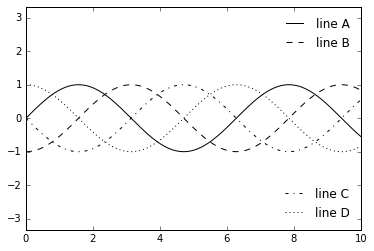

In [31]:
fig, ax = plt.subplots()
lines = []
styles = ['-', '--', '-.', ':']

x = np.linspace(0, 10, 1000)
for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')

ax.axis('equal')

# 设置第一个图例要显示的线条和标签
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# 创建第二个图例，通过add_artist方法添加到提上
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg)

# 4.9 配置颜色条

In [33]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [34]:
%matplotlib inline
import numpy as np

In [35]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

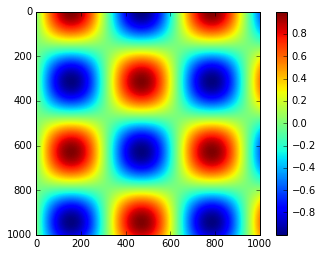

In [39]:
plt.imshow(I)
plt.colorbar()

## 4.9.1 配置颜色条

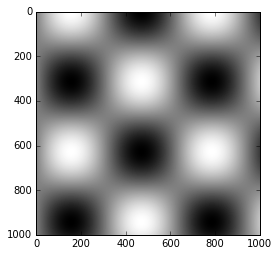

In [40]:
plt.imshow(I, cmap='gray')

1. 选择配色方案

顺序配色方案；互逆配色方案；定性配色方案

通过把jet转换为黑白的灰度图看看具体的颜色。

In [41]:
from matplotlib.colors import LinearSegmentedColormap

In [54]:
cmap = 'jet'
cmap = plt.cm.get_cmap(cmap)

In [55]:
np.arange(cmap.N)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [61]:
colors = cmap(np.arange(cmap.N))
RGB_weight = [0.299, 0.587, 0.114]
cmap(np.arange(cmap.N))

array([[0.        , 0.        , 0.5       , 1.        ],
       [0.        , 0.        , 0.51782531, 1.        ],
       [0.        , 0.        , 0.53565062, 1.        ],
       ...,
       [0.53565062, 0.        , 0.        , 1.        ],
       [0.51782531, 0.        , 0.        , 1.        ],
       [0.5       , 0.        , 0.        , 1.        ]])

In [62]:
np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))

array([0.16881943, 0.17483795, 0.18085647, 0.18687498, 0.1928935 ,
       0.19891202, 0.20493054, 0.21094906, 0.21696757, 0.22298609,
       0.22900461, 0.23502313, 0.24104165, 0.24706016, 0.25307868,
       0.2590972 , 0.26511572, 0.27113424, 0.27715275, 0.28317127,
       0.28918979, 0.29520831, 0.30122683, 0.30724534, 0.31326386,
       0.31928238, 0.3253009 , 0.33131942, 0.33733793, 0.33763886,
       0.33763886, 0.33763886, 0.3376422 , 0.33790946, 0.33860334,
       0.33972123, 0.34125897, 0.3432109 , 0.34557001, 0.34832804,
       0.35147558, 0.35500228, 0.35889695, 0.36314777, 0.36774238,
       0.37266807, 0.37791188, 0.38346077, 0.3893017 , 0.39542172,
       0.40180808, 0.40844828, 0.41533016, 0.4224419 , 0.42977209,
       0.43730974, 0.44504432, 0.45296574, 0.46106436, 0.46933101,
       0.47775698, 0.48633397, 0.49505415, 0.50391007, 0.51289471,
       0.52200142, 0.53122392, 0.54055629, 0.54999293, 0.55952856,
       0.56915822, 0.57887721, 0.5886811 , 0.59856572, 0.60852

In [63]:
luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
colors[:, :3] = luminance[:, np.newaxis]

In [64]:
colors

array([[0.16881943, 0.16881943, 0.16881943, 1.        ],
       [0.17483795, 0.17483795, 0.17483795, 1.        ],
       [0.18085647, 0.18085647, 0.18085647, 1.        ],
       ...,
       [0.29289854, 0.29289854, 0.29289854, 1.        ],
       [0.2831515 , 0.2831515 , 0.2831515 , 1.        ],
       [0.27340446, 0.27340446, 0.27340446, 1.        ]])

In [43]:
def grayscale_cmap(cmap):
    """为配色方案显示灰度图"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    
    # 将RGBA色转换为不同亮度的灰度值
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)

In [44]:
def view_colormap(cmap):
    """用等价的灰度图表示配色方案"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2), subplot_kw=dict(xticks=[], yticks=[]))
    
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

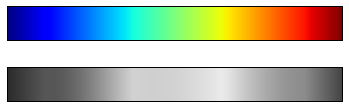

In [45]:
view_colormap('jet')

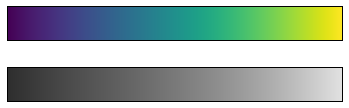

In [46]:
view_colormap('viridis')

彩虹效果推荐配色方案

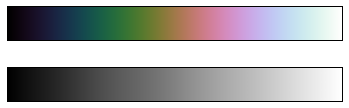

In [47]:
view_colormap('cubehelix')

用红色、蓝色表示的正反两种信息在灰度图上看不出差别！

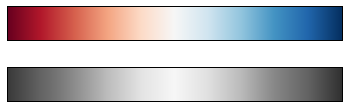

In [49]:
view_colormap('RdBu')

2. 颜色条刻度的限制与扩展功能的设置

In [65]:
# 为图形像素设置1%的噪点
speckles = (np.random.random(I.shape) < 0.01)

In [66]:
speckles

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False]])

In [68]:
I

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ...,  0.44228718,
         0.44940242,  0.45647263]])

In [69]:
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

In [70]:
I

array([[ 0.        ,  0.01000984,  0.02001868, ..., -0.52711499,
        -0.53559488, -0.54402111],
       [ 0.        ,  0.01000934,  0.02001768, ..., -0.52708858,
        -0.53556805, -0.54399386],
       [ 0.        ,  0.01000784,  0.02001467, ..., -0.52700936,
        -0.53548755, -0.54391209],
       ...,
       [-0.        , -0.0085063 , -0.01701176, ...,  0.44793914,
         0.4551453 ,  0.46230586],
       [-0.        , -0.00845306, -0.01690528, ...,  0.44513546,
         0.45229652,  0.45941226],
       [-0.        , -0.00839897, -0.01679711, ..., -2.18839093,
         0.44940242,  0.45647263]])

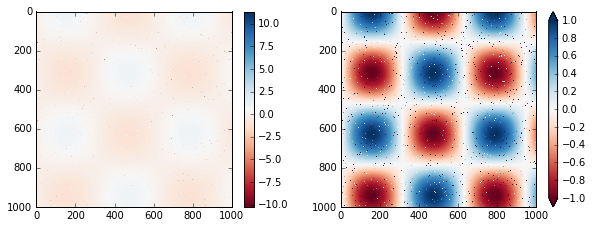

In [72]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1)

3. 离散型颜色条

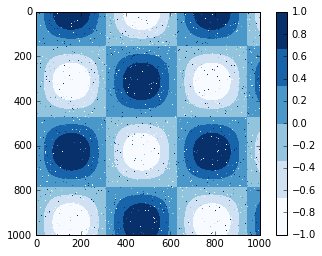

In [73]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1)

## 4.9.2 案例：手写数字

In [74]:
# 加载数字0~5的图形，对其进行可视化
from sklearn.datasets import load_digits

In [75]:
digits = load_digits(n_class=6)

In [76]:
digits

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number o

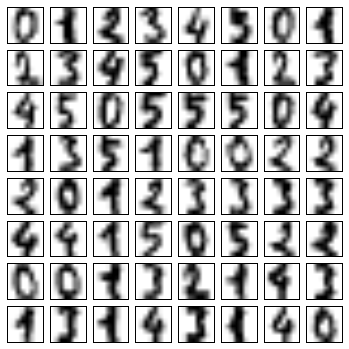

In [77]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [78]:
# 用IsoMap方法将数字投影到二维空间
from sklearn.manifold import Isomap

In [79]:
iso = Isomap(n_components=2)

In [80]:
projection = iso.fit_transform(digits.data)

In [81]:
projection

array([[ 151.52041613,   55.39201656],
       [ -97.77177886,   58.0822836 ],
       [-112.70662015,  -45.22557972],
       ...,
       [   8.8746121 ,  111.16000848],
       [  12.29531467,   95.65099338],
       [ 106.8409937 ,   83.03555368]])

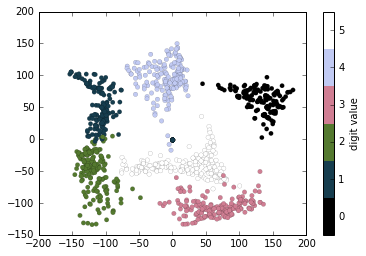

In [82]:
# 画图
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)

# 4.10 多子图

In [84]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

## 4.10.1 plt.axes：手动创建子图